In [15]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [9]:
log_df = pd.read_csv(Path(Path.home(), "Documents/xray/tmp/log.csv"), index_col=0)
log_df.head(5)

,step,time,ff,xray_0,r_work_0,r_free_0,rmsd_ord,rmsd_avg,occ_0,occ_1,pdb,copy
0,0,9.536743e-07,5.429363,5.556741,0.398360,0.397007,0.623464,0.332180,0.146982,0.853018,/wynton/group/sali/mhancock/xray/sample_bench/...,1
1,1,1.698523e+01,35.548480,5.557259,0.398760,0.396502,0.624717,0.332098,0.146982,0.853018,NaN,0
2,2,2.221848e+01,155.981687,5.555816,0.398559,0.395457,0.624403,0.328718,0.146982,0.853018,NaN,0
3,3,2.743158e+01,247.921495,5.549189,0.395954,0.392735,0.626041,0.328399,0.146982,0.853018,NaN,0
4,4,3.267278e+01,321.774685,5.536316,0.390632,0.388022,0.627466,0.327708,0.146982,0.853018,NaN,0


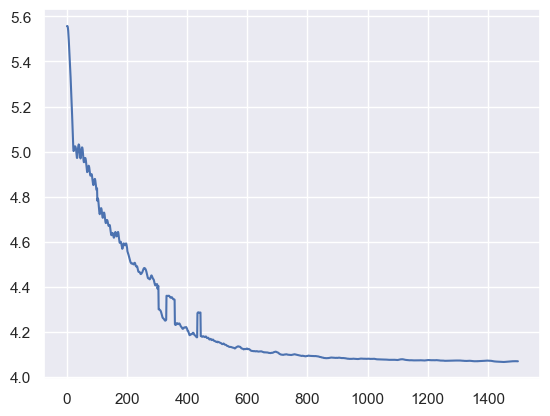

In [10]:
plt.plot(log_df["step"], log_df["xray_0"])
# plt.savefig(Path(Path.home(), "Desktop/log_plot.png"))

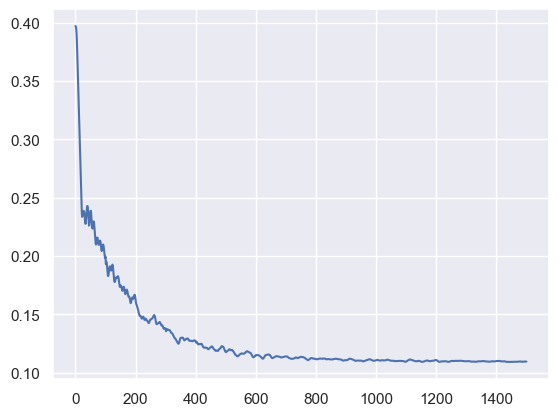

In [11]:
plt.plot(log_df["step"], log_df["r_free_0"])

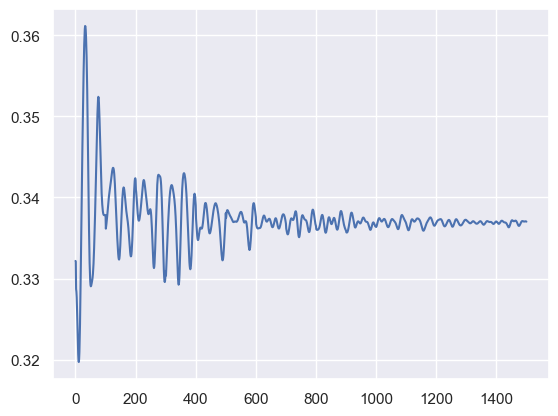

In [12]:
plt.plot(log_df["step"], log_df["rmsd_avg"])

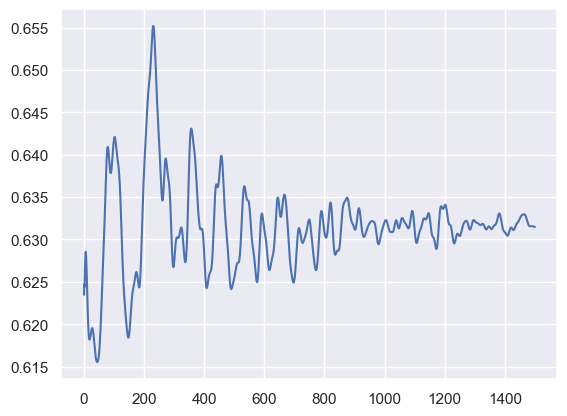

In [14]:
plt.plot(log_df["step"], log_df["rmsd_ord"])

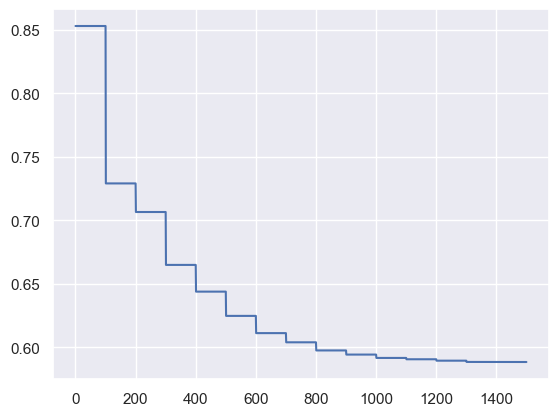

In [16]:
plt.plot(log_df["step"], log_df["occ_1"])

In [50]:
min_length = np.min([len(log_df) for log_df in log_dfs])
print(min_length)

all_curves = np.zeros(shape=[len(log_dfs), min_length])
for i in range(len(log_dfs)):
    log_df = log_dfs[i]
    all_curves[i] = log_df["xray_0"].iloc[0:min_length]

# max_length = np.max([len(log_df) for log_df in log_dfs])
# print(max_length)

# mean_vals = [0]*max_length
# mean_vals_counts = [0]*max_length

# for log_df in log_dfs: 
#     i = 0
#     while i < len(log_df): 
#         mean_vals[i] = mean_vals[i] + log_df["xray_0"].iloc[i]
#         mean_vals_counts[i] = mean_vals_counts[i] + 1
            
#         i = i+1
        
# for i in range(max_length): 
#     mean_vals[i] = mean_vals[i]/mean_vals_counts[i]

1501


In [56]:
np.mean(all_curves, axis=0)

1501

In [64]:
log_df_lengths = list() 
for log_df in log_dfs: 
    log_df_lengths.append(len(log_df))

In [67]:
np.percentile(log_df_lengths, 50-95/2, axis=0)

1301.0

1401
1501
1701


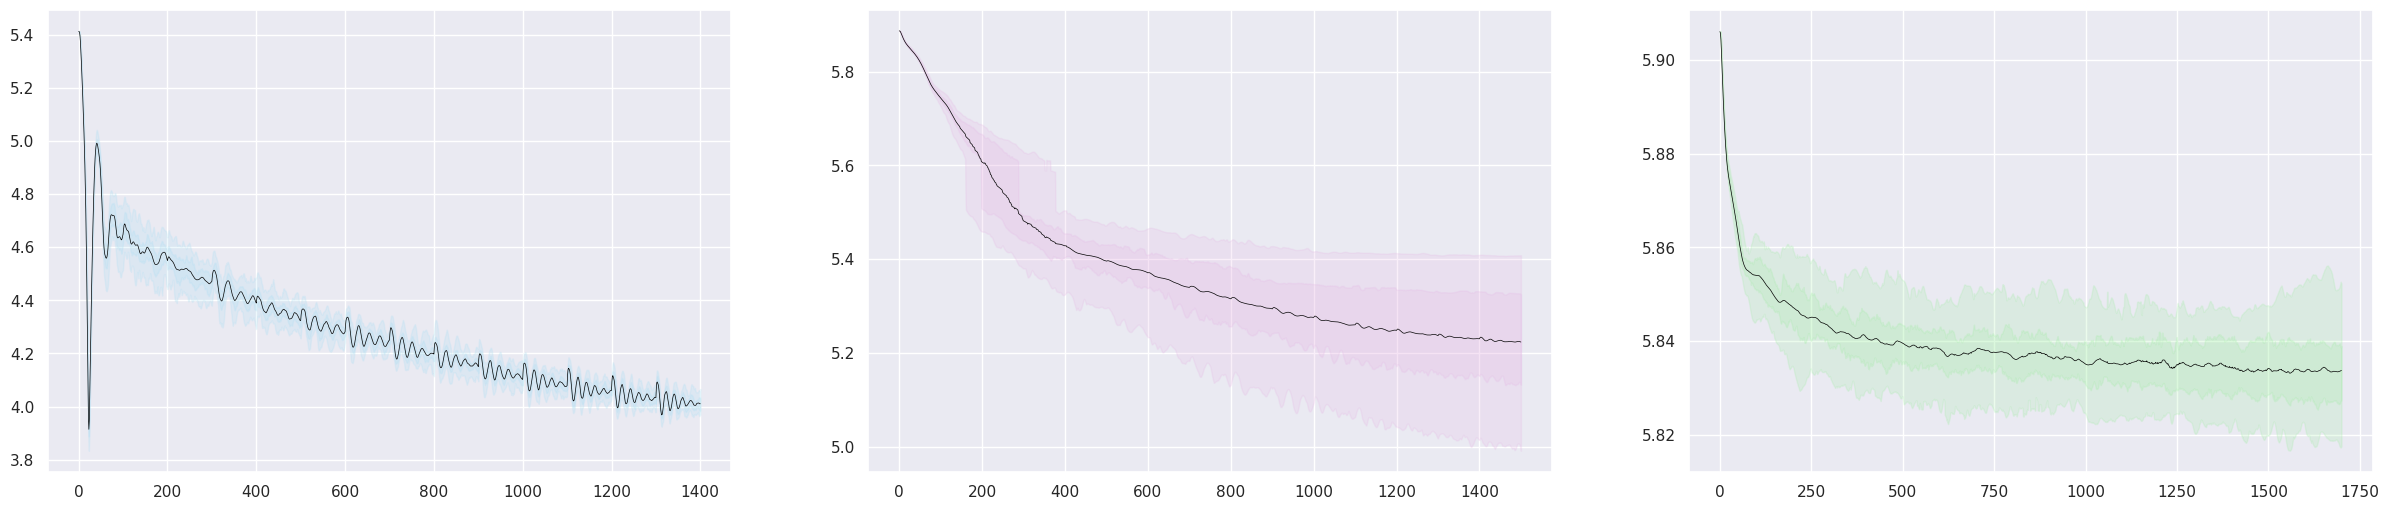

In [83]:
fig, axs = plt.subplots(1,3, figsize=(30,6))

exp_dir = Path("/wynton/group/sali/mhancock/xray/sample_bench/out/3ca7/66_native_1x")
ax_id = 0 

colors = ["#a6def2","#e5b3e4", "#9eeea1"]
for job_id in ["0", "21", "35"]: 
    job_dir = Path(exp_dir, job_id)
    log_dfs = list() 
    for out_dir in job_dir.glob("output*"):
        try: 
            log_df = pd.read_csv(Path(out_dir, "log.csv"))
        except pd.errors.EmptyDataError: 
            continue 
            
        log_dfs.append(log_df)

    # Only include log_dfs that are within 95% CI. 
    pruned_log_dfs = list() 
    for log_df in log_dfs: 
        if len(log_df) > np.percentile(log_df_lengths, 50-95/2, axis=0): 
            pruned_log_dfs.append(log_df)
        
    min_length = np.min([len(log_df) for log_df in pruned_log_dfs])
    print(min_length)
    all_curves = np.zeros(shape=[len(pruned_log_dfs), min_length])

    # Populate all curves np matrix. 
    for i in range(len(pruned_log_dfs)):
        log_df = pruned_log_dfs[i]
        all_curves[i] = log_df["xray_0"].iloc[0:min_length]

    # Plot CIs. 
    for ci in [95,50]: 
        low = np.percentile(all_curves, 50 - ci / 2, axis=0)
        high = np.percentile(all_curves, 50 + ci / 2, axis=0)
        axs[ax_id].fill_between(range(min_length), low, high, color=colors[ax_id], alpha=0.2)

    axs[ax_id].plot(range(min_length), np.mean(all_curves, axis=0), c='black', linewidth=.5)
    ax_id = ax_id+1
    
plt.savefig(Path(Path.home(),"xray/tmp/plot_log.png"))

In [39]:
mean_vals[-1]

3.7071160564619534

In [41]:
mean_vals

[5.061004420899502,
 5.062857922476287,
 5.060787565808305,
 5.047413134535193,
 5.016612130491495,
 4.966130894056153,
 4.898127589023707,
 4.815175611366786,
 4.7179255086283085,
 4.609826609375831,
 4.501856516415326,
 4.40732719888845,
 4.3303532959308555,
 4.266433076317136,
 4.213859070884226,
 4.1776331304088945,
 4.164329445998633,
 4.1793988458826,
 4.224011776965928,
 4.291178356004292,
 4.365686837647662,
 4.433163525116759,
 4.487654225814051,
 4.53068754063284,
 4.567834247211034,
 4.6033667957806,
 4.6376928347022375,
 4.669759914790355,
 4.696988703614977,
 4.71565849657598,
 4.721276589244341,
 4.7108714745381945,
 4.684566543619456,
 4.646575154207204,
 4.602620812579632,
 4.558219690133509,
 4.517664947123002,
 4.482562631663047,
 4.453142505505932,
 4.426457665793567,
 4.400742754832614,
 4.378229356191092,
 4.3613371120444215,
 4.349400577533883,
 4.339925826271355,
 4.333903323130205,
 4.336929449301308,
 4.352337132133759,
 4.378081886210683,
 4.408926874937106,
 

In [37]:
mean_vals_counts[0]

50

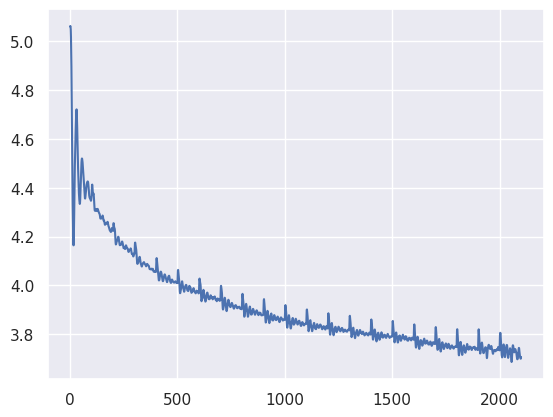

In [40]:
plt.plot(range(max_length), mean_vals)
# plt.plot(log_df["step"], log_df["r_free_0"], alpha=0.02, c="black", linewidth=1)
plt.show()

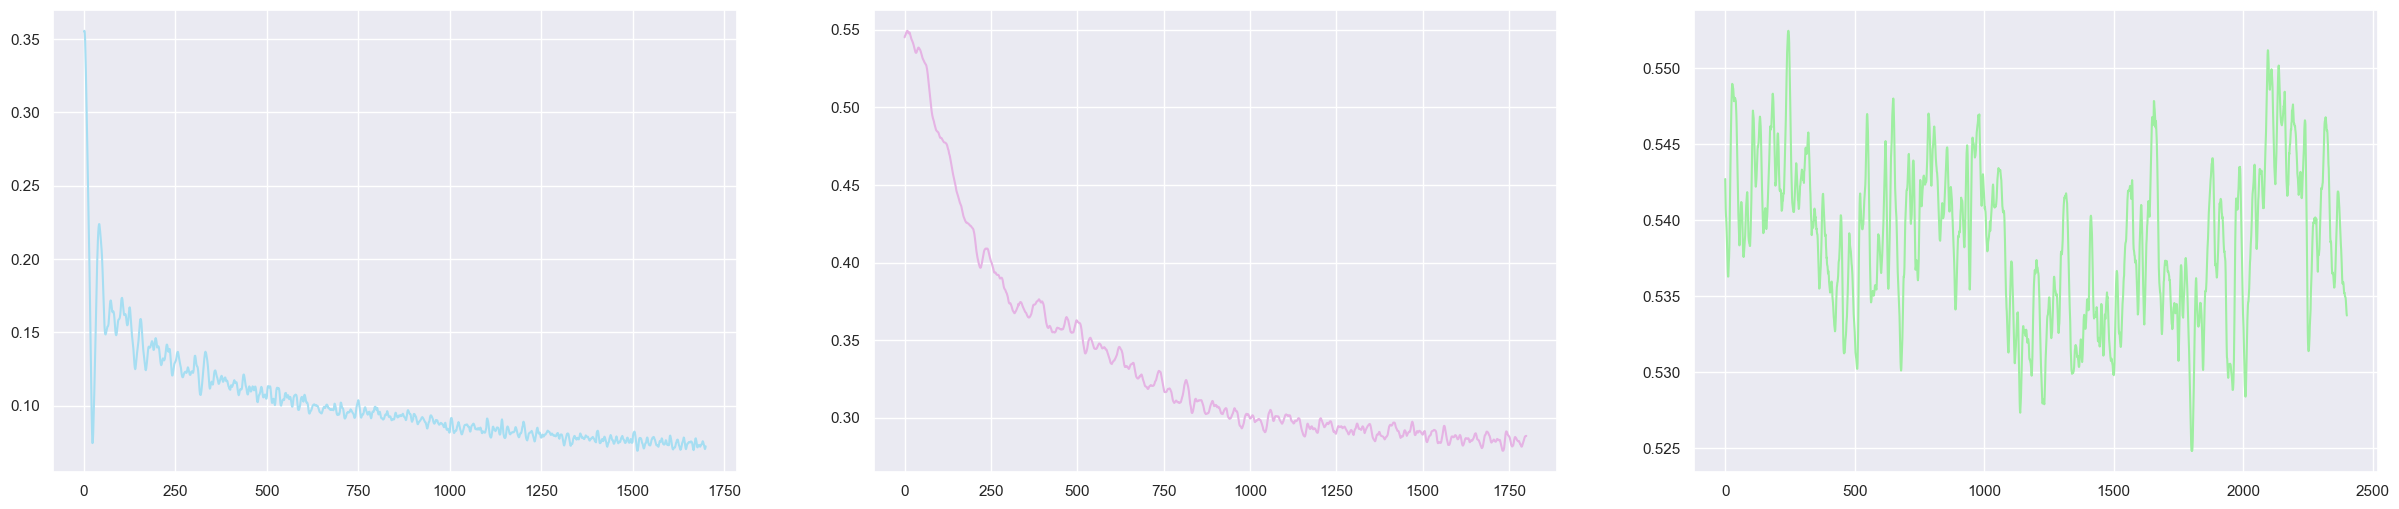

In [7]:
log_dir = Path(Path.home(), "Documents/xray/tmp")
log_files = [Path(log_dir, "log_0.csv"), Path(log_dir, "log_21.csv"), Path(log_dir, "log_35.csv")]

colors = ["#a6def2", "#e5b3e4", "#9eeea1"]

fig, axs = plt.subplots(1,3, figsize=(30,6))
ax1,ax2 = axs[0],axs[1]

for i in range(len(log_files)): 
    c = colors[i]
    log_file = log_files[i]
    ax = axs[i]

    log_df = pd.read_csv(log_file, index_col=0)

    ax.plot(log_df["step"], log_df["r_free_0"], c=c)

plt.savefig(Path(Path.home(), "Desktop/plot_log.png"))